In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet')
df.head()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000


> **Some basic dataProcessing**

In [3]:
#Removing columns that are null entirely
nullColumns = []

nullColumns = df.columns[pd.isnull(df).all()].tolist()
df = df.drop(nullColumns, axis=1)
df.shape

nanValues = df.isnull().sum()
df.dropna(inplace=True)
df.shape

(1520703, 83)

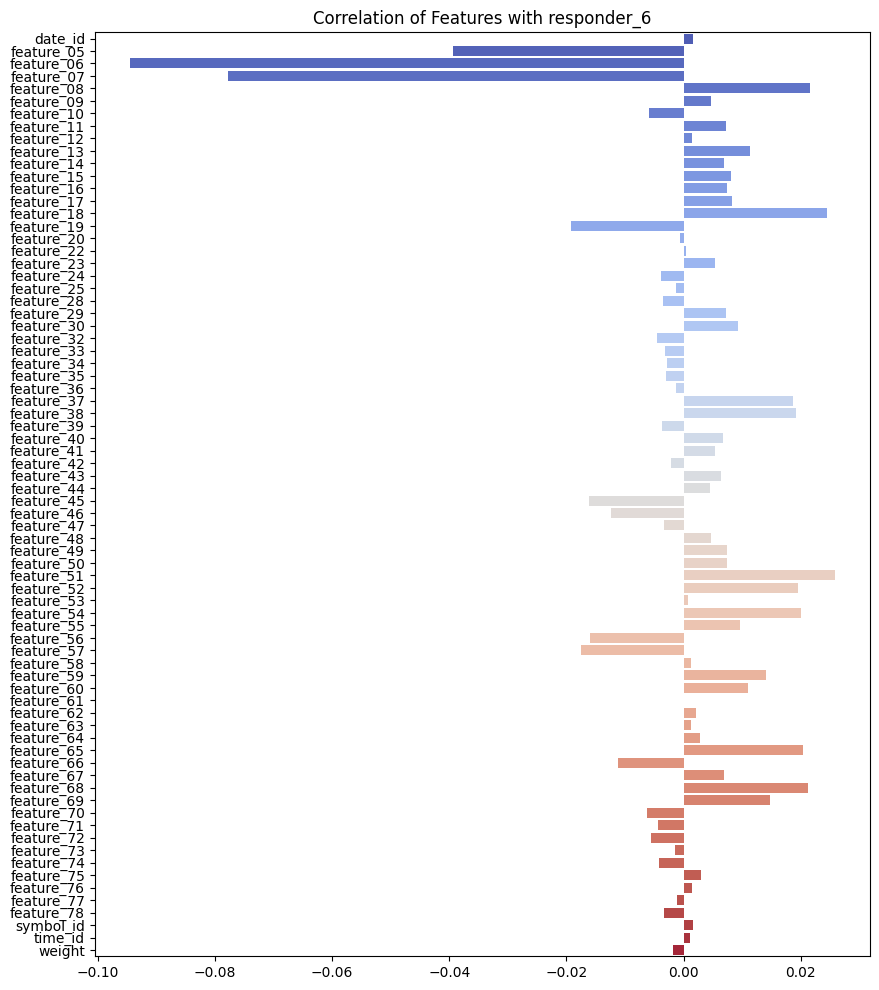

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
feature_columns = df.columns.difference(['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                                         'responder_4', 'responder_5', 'responder_7', 'responder_8', 
                                         'responder_6'])

# Compute the correlation of features with responder_6
corr_with_responder6 = df[feature_columns].corrwith(df['responder_6'])

# Visualize the correlation with a bar plot
plt.figure(figsize=(10, 12))
sns.barplot(y=corr_with_responder6.index, x=corr_with_responder6.values, palette='coolwarm')
plt.title('Correlation of Features with responder_6')
plt.show()


In [5]:
# Set a threshold for low correlation (e.g., abs(correlation) < 0.05)
low_correlation_features = corr_with_responder6[abs(corr_with_responder6) < 0.05].index

# Drop low-correlation features from the DataFrame
df_cleaned = df.drop(columns=low_correlation_features)

print(f"Features dropped due to low correlation with responder_6: {list(low_correlation_features)}")

Features dropped due to low correlation with responder_6: ['date_id', 'feature_05', 'feature_08', 'feature_09', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29', 'feature_30', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75', 'feature_76', 'featu

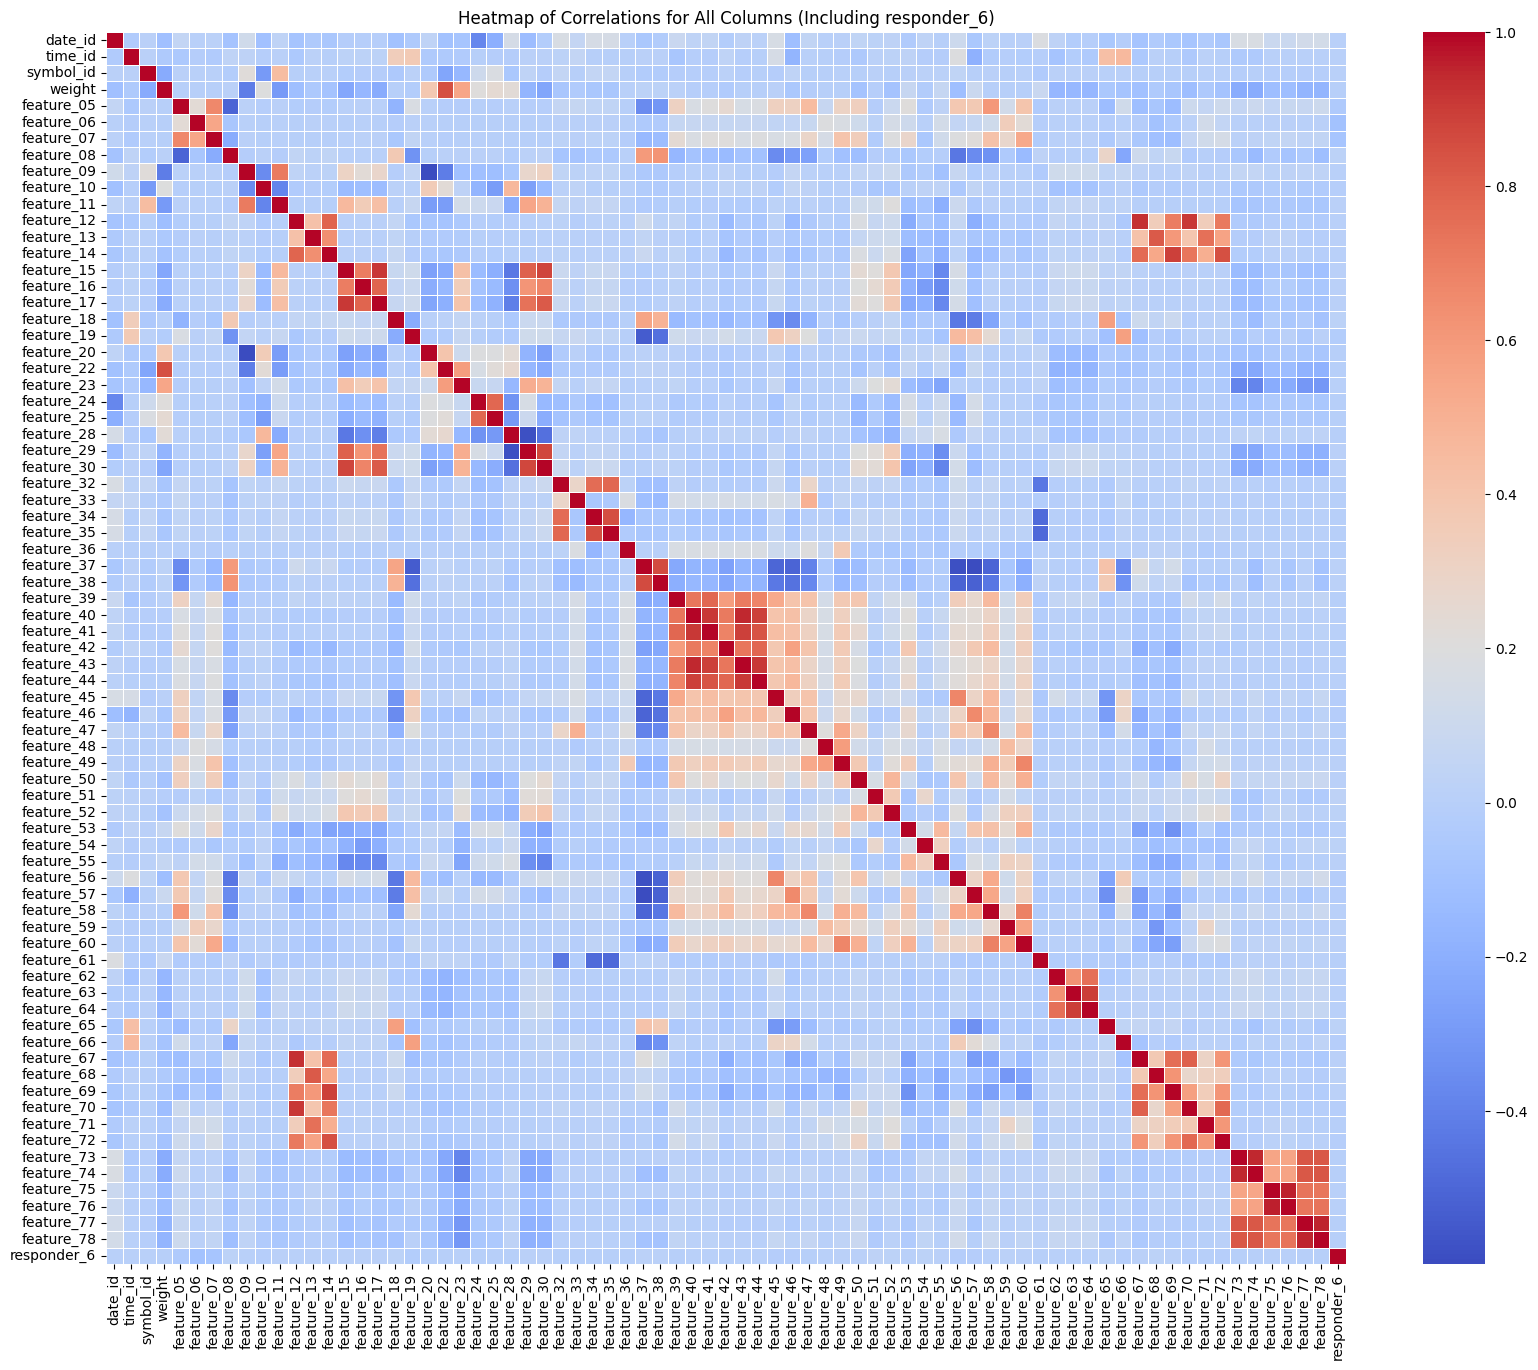

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
data = df.drop(columns=['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                        'responder_4', 'responder_5', 'responder_7', 'responder_8'])

# Set up the figure size for a large heatmap
plt.figure(figsize=(20, 16))

# Generate the heatmap for the dataset correlations
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlations for All Columns (Including responder_6)')
plt.show()


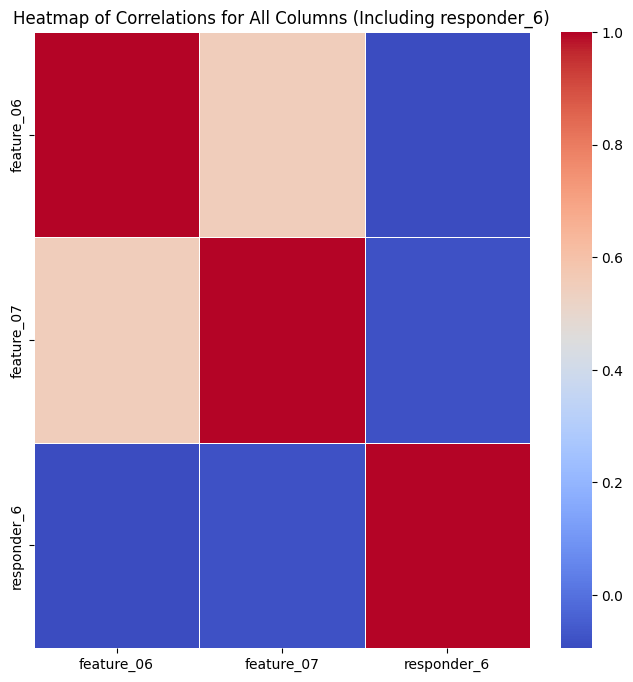

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop all responder columns except responder_6
data = df_cleaned.drop(columns=['responder_0', 'responder_1', 'responder_2', 'responder_3', 
                        'responder_4', 'responder_5', 'responder_7', 'responder_8'])

# Set up the figure size for a large heatmap
plt.figure(figsize=(8, 8))

# Generate the heatmap for the dataset correlations
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Heatmap of Correlations for All Columns (Including responder_6)')
plt.show()

In [8]:
df_cleaned.drop(columns=['responder_0',	'responder_1',	'responder_2',	'responder_3',	'responder_4',	'responder_5',  'responder_7',	'responder_8']).head()

,feature_06,feature_07,responder_6
544,-0.439474,-0.362802,0.606898
552,-0.177896,-0.376268,0.988712
560,-0.445407,-0.331839,1.233700
568,-0.277384,-0.548282,0.818362
576,-0.148101,-0.372258,1.141571


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is already preprocessed and loaded

# Define the target variable (responder_6) and features
X = df_cleaned.drop(columns=['responder_6'])  # Features
y = df_cleaned['responder_6']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.1386051237899232
R-squared: 0.7899532139732046


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is already preprocessed and loaded

# Define the target variable (responder_6) and features
X = df_cleaned.drop(columns=['responder_6'])  # Features
y = df_cleaned['responder_6']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1729352601.385692      84 service.cc:145] XLA service 0x783f54003cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729352601.385758      84 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   97/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.6107

I0000 00:00:1729352602.311696      84 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30415/30415 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 0.2036 - val_loss: 0.1577
Epoch 2/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1542 - val_loss: 0.1464
Epoch 3/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1496 - val_loss: 0.1482
Epoch 4/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.1465 - val_loss: 0.1439
Epoch 5/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1460 - val_loss: 0.1485
Epoch 6/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.1443 - val_loss: 0.1444
Epoch 7/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1435 - val_loss: 0.1417
Epoch 8/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1429 - val_loss: 0.1412
Epoch 9/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1417 - val_loss: 0.1484
Epoch 10/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1419 - val_loss: 0.1469
Epoch 11/100
30415/30415 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.1407 - val_loss: 0.139